<a href="https://colab.research.google.com/github/apskis/data_science_ai_colab_books/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lecture: K-Nearest Neighbors (KNN) Classification & KNN Imputer

## Learning Objectives
By the end of this lecture, you will:
- Understand the intuition behind KNN classification.
- Implement KNN using scikit-learn.
- Explore hyperparameters like `k` and distance metrics.
- Evaluate KNN performance with accuracy, confusion matrix, and visualization.
- Learn about missing data handling using the KNN imputer.
- Practice hands-on coding with real datasets.

# 🔍 What is KNN?
- **Instance-based learning**: KNN stores training data and makes predictions by comparing new points to stored examples.
- **Lazy learning**: No explicit training phase; predictions happen at query time.
- **Key idea**: "Birds of a feather flock together." A point is classified based on the majority class of its nearest neighbors.

---

## Steps in KNN Classification
1. Choose the number of neighbors `k`.
2. Compute the distance (Euclidean, Manhattan, etc.) between the query point and all training points.
3. Select the `k` nearest neighbors.
4. Assign the majority class among those neighbors.

---


In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns

wine = load_wine()
X = wine.data
y = wine.target

X = pd.DataFrame(X, columns=wine.feature_names)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

f1_score(y_test, y_pred, average='weighted')

0.7111111111111111

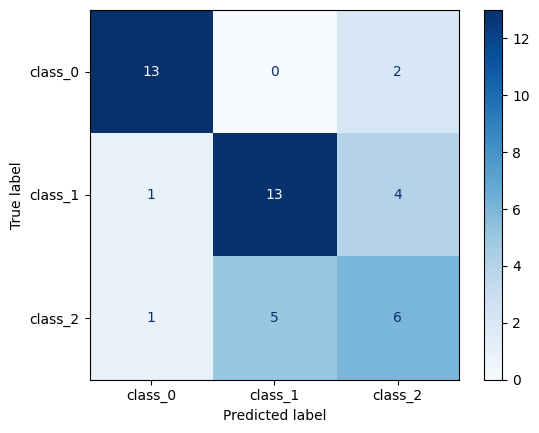

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
disp.plot(cmap='Blues')
plt.show()

# Hyperparameters in KNN
- `n_neighbors`: Number of neighbors (k).
- `weights`: Uniform vs distance-weighted.
- `metric`: Distance function (Euclidean, Manhattan, Minkowski).
- Trade-off: Small k → sensitive to noise; Large k → smoother but may miss local patterns.


In [ ]:
from sklearn.datasets import make_classification

# Generate synthetic dataset
X_syn, y_syn = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                   n_clusters_per_class=2, n_samples=2_000, random_state=4,
                                   class_sep=.2)

X_train, X_test, y_train, y_test = train_test_split(X_syn, y_syn, test_size=0.25,
                                                    random_state=42)

In [ ]:
def num_neighbors(k):
  # Fit KNN
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  knn.score(X_test, y_test)
  print(f"k={k}, Test Accuracy={knn.score(X_test, y_test):.3f}")
  print(f"Train Accuracy={knn.score(X_train, y_train):.3f}")

  # Plot decision boundary
  h = .02
  x_min, x_max = X_syn[:, 0].min() - 1, X_syn[:, 0].max() + 1
  y_min, y_max = X_syn[:, 1].min() - 1, X_syn[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

  Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(xx, yy, Z, alpha=0.3)
  plt.scatter(X_syn[:, 0], X_syn[:, 1], c=y_syn, edgecolor='k', s=50)
  plt.title(f"KNN Decision Boundary (k={k})")
  plt.show()

k=11, Test Accuracy=0.862
Train Accuracy=0.876


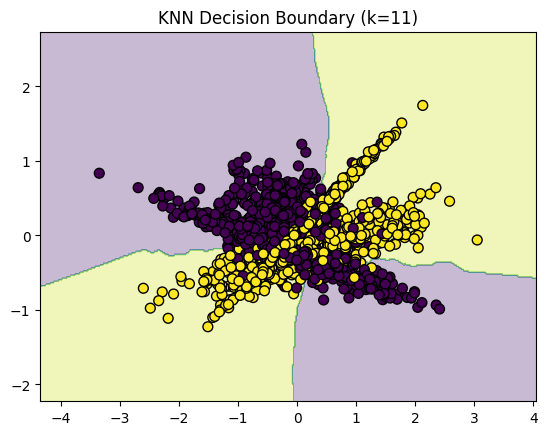

In [ ]:
num_neighbors(11)

k=1, Test Accuracy=0.820
Train Accuracy=1.000


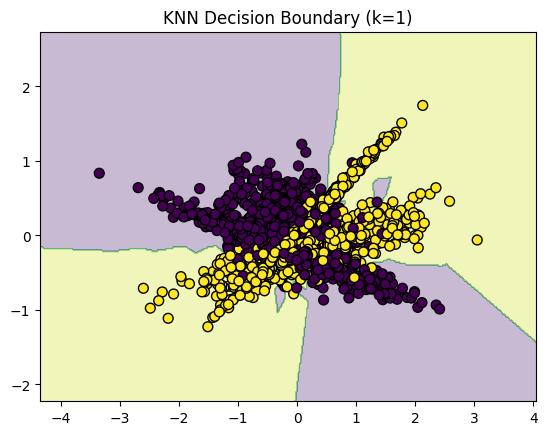

k=3, Test Accuracy=0.862
Train Accuracy=0.906


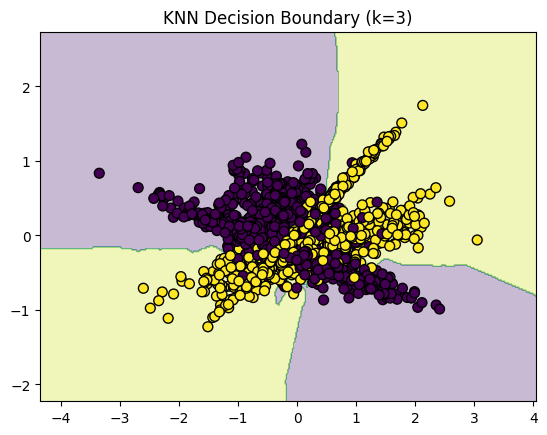

k=5, Test Accuracy=0.864
Train Accuracy=0.893


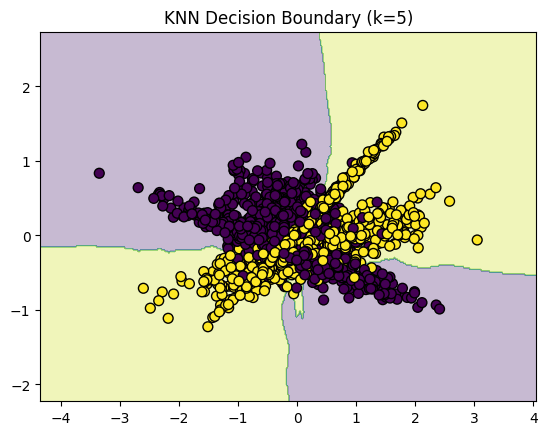

k=7, Test Accuracy=0.868
Train Accuracy=0.883


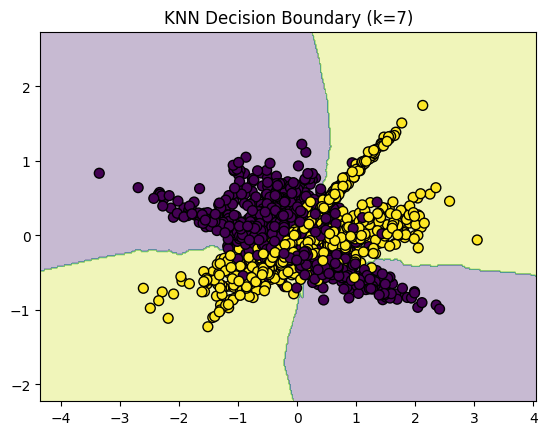

k=9, Test Accuracy=0.866
Train Accuracy=0.877


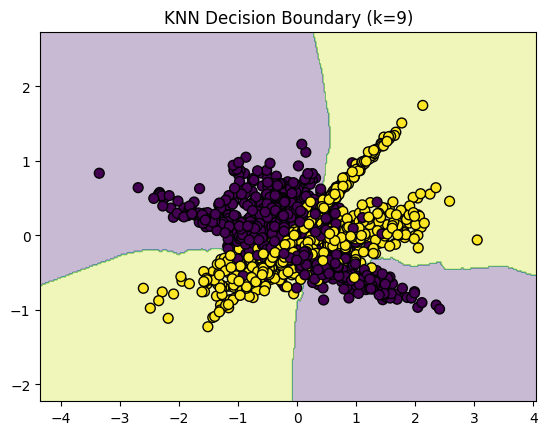

k=11, Test Accuracy=0.862
Train Accuracy=0.876


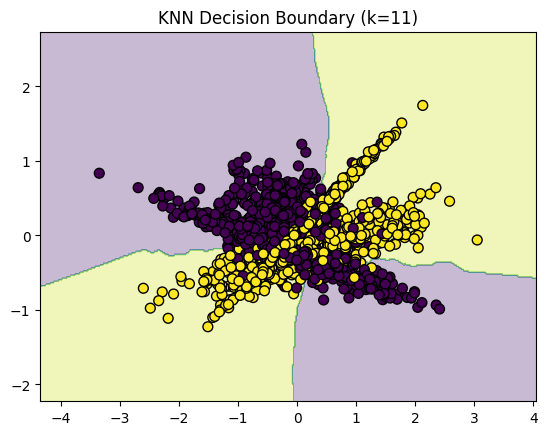

In [ ]:
for k in [1, 3, 5, 7, 9, 11]:
  num_neighbors(k)

# KNN Imputer
- Missing values are common in real datasets.
- KNN Imputer replaces missing values using the mean of the nearest neighbors.
- Useful when data has patterns that simple mean/median imputation might miss.


In [ ]:
iris

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data

In [ ]:
# going to take random values from the iris dataset
# fill them in with null values

# fill in null values using the mean imputation
# and using the KNN imputer

# see which one does better

In [ ]:
# ground truth dataset
df_original = pd.DataFrame(X, columns=iris.feature_names)
# dataset that I add missing values
df_missing = df_original.copy()
df_original.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# add missing values
# 10 rows and add missing values

ten_rows = df_missing.sample(10, random_state=42).index
df_missing.loc[ten_rows, 'sepal length (cm)'] = np.nan

In [ ]:
type(df_mean_imputed)

pandas.core.series.Series

In [ ]:
# mean imputation
from sklearn.metrics import mean_squared_error

df_mean_imputed = pd.DataFrame(df_original.loc[ten_rows, 'sepal length (cm)']).copy()
#df_missing['sepal length (cm)'].mean()
df_mean_imputed['mean_imputed'] = df_missing['sepal length (cm)'].mean()
df_mean_imputed.columns = ['original_value', 'mean_imputed']
mean_squared_error(df_mean_imputed['original_value'], df_mean_imputed['mean_imputed'])

0.6184698979591838

In [ ]:
# knn imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = pd.DataFrame(imputer.fit_transform(df_missing), columns=df_missing.columns)
df_knn_imputed.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df_mean_imputed['knn_imputer'] = df_knn_imputed.loc[ten_rows, 'sepal length (cm)']
df_mean_imputed

,original_value,mean_imputed,knn_imputer
73,6.1,5.816429,6.20
18,5.7,5.816429,5.16
118,7.7,5.816429,7.54
78,6.0,5.816429,6.04
76,6.8,5.816429,6.20
31,5.4,5.816429,4.96
64,5.6,5.816429,5.70
141,6.9,5.816429,6.38
68,6.2,5.816429,5.80
82,5.8,5.816429,5.64


In [ ]:
mean_squared_error(df_mean_imputed['original_value'], df_mean_imputed['knn_imputer'])

0.13484000000000032

<Axes: >

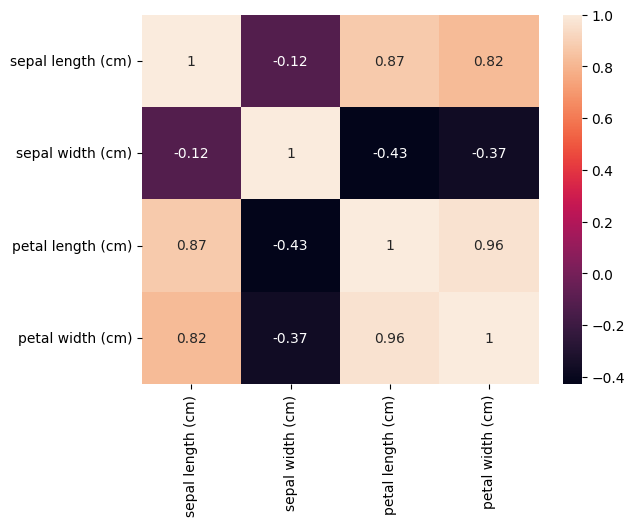

In [ ]:
sns.heatmap(df_original.corr(), annot=True)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/VinayBN8997/Titanic-EDA/refs/heads/master/Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df['Survived'].value_counts(normalize=True)

,proportion
Survived,
0,0.616162
1,0.383838


In [ ]:
cols_of_interest = ['Pclass', 'Age', 'Sex', 'Fare', 'Survived']
df_ss = df[cols_of_interest].copy()
df_ss.head()

,Pclass,Age,Sex,Fare,Survived
0,3,22.0,male,7.2500,0
1,1,38.0,female,71.2833,1
2,3,26.0,female,7.9250,1
3,1,35.0,female,53.1000,1
4,3,35.0,male,8.0500,0


In [ ]:
df_ss.isnull().sum()

,0
Pclass,0
Age,177
Sex,0
Fare,0
Survived,0


In [ ]:
df_ss['Sex'] = df_ss['Sex'].map({'male': 0, 'female': 1})

<Axes: >

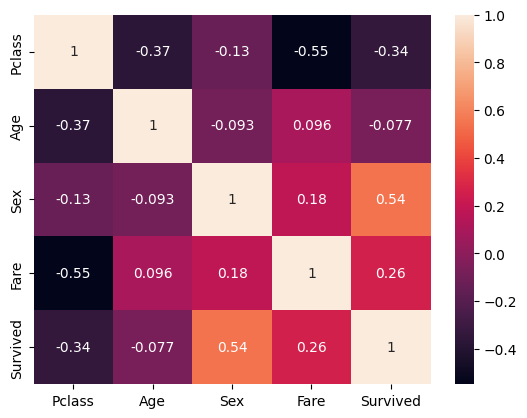

In [ ]:
sns.heatmap(df_ss.corr(), annot=True)

In [ ]:
df_ss.head(2)

,Pclass,Age,Sex,Fare,Survived
0,3,22.0,0,7.2500,0
1,1,38.0,1,71.2833,1


In [ ]:
# perform train test split prior to Scaling and KNN Imputer
X_train, X_test, y_train, y_test = train_test_split(
    df_ss.drop(columns=['Survived']), df_ss['Survived'],
    test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [ ]:
# knn imputer

imputer = KNNImputer(n_neighbors=5)
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_scaled),
                             columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test_scaled),
                             columns=X_test.columns)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_imputed, y_train)
y_pred = knn.predict(X_test_imputed)

f1_score(y_test, y_pred, average='weighted')
f1_score(y_train, knn.predict(X_train_imputed), average='weighted')

print(f1_score(y_test, y_pred, average='weighted'))
print(f1_score(y_train, knn.predict(X_train_imputed), average='weighted'))

0.8174241736692722
0.8694459819856087


In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_imputed, y_train)
y_pred = knn.predict(X_test_imputed)

f1_score(y_test, y_pred, average='weighted')
f1_score(y_train, knn.predict(X_train_imputed), average='weighted')

print(f1_score(y_test, y_pred, average='weighted'))
print(f1_score(y_train, knn.predict(X_train_imputed), average='weighted'))

0.8404969536418717
0.8560165365111221


In [ ]:
# logistic regression